
Confusion Matrix:
 [[70  1]
 [ 2 41]]
Precision: 0.9761904761904762
Recall: 0.9534883720930233
ROC-AUC: 0.99737962659679


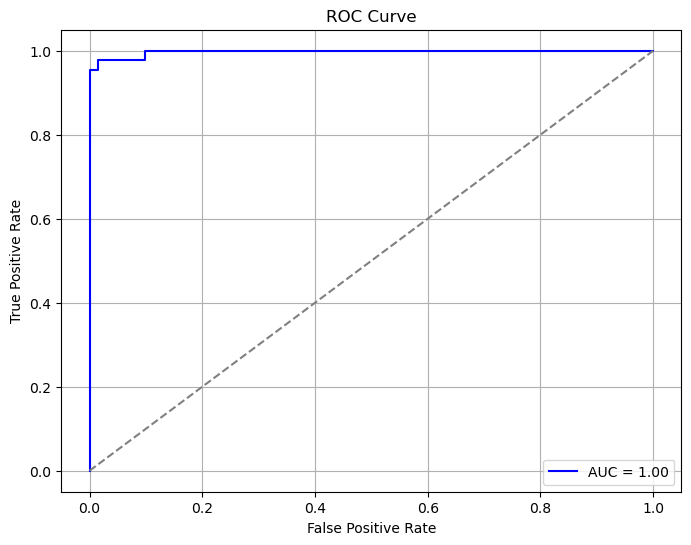


Confusion Matrix at Threshold = 0.3:
 [[67  4]
 [ 1 42]]


'\nLogistic Regression uses the sigmoid function:\n    σ(z) = 1 / (1 + e^(-z))\nIt converts linear output into probability (0 to 1). The threshold (default 0.5) can be tuned\nfor better recall or precision, depending on the application.\n'

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, 
    precision_score, 
    recall_score, 
    roc_auc_score, 
    roc_curve
)

df = pd.read_csv(r"C:\Users\Admin\Desktop\data.csv")

df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
y_pred = model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nConfusion Matrix:\n", cm)
print("Precision:", precision)
print("Recall:", recall)
print("ROC-AUC:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='blue')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

threshold = 0.3
y_pred_custom = (y_pred_proba >= threshold).astype(int)
cm_custom = confusion_matrix(y_test, y_pred_custom)
print(f"\nConfusion Matrix at Threshold = {threshold}:\n", cm_custom)

"""
Logistic Regression uses the sigmoid function:
    σ(z) = 1 / (1 + e^(-z))
It converts linear output into probability (0 to 1). The threshold (default 0.5) can be tuned
for better recall or precision, depending on the application.
"""
